In [36]:
import numpy as np
import math 
import random
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
sns.set()

In [39]:
# Road Length (unit: m)
L = 200
# Temporal Step Length (unit: s)
delta_t = 0.5

In [40]:
# Generate number of non-EMVs in the system:
def get_number_vehicles():
    return np.random.randint(low=5, high=20)

# Generate random vehicle length (unit: s)
def get_vehicle_length(avg=4.45, std=0.5):
    return np.around(np.random.normal(4.45, 0.5),2)

def get_starting_velocity(avg=6, std=1.5):
    return np.around(np.random.normal(6, 1.5),2)

def get_vehicle_type():
    # 0: HV, 1: CV
    return np.random.randint(2)

In [56]:
def generate_road_initial(num_vehicles):
    """
    Generate an initial state for road environment with the following format:
    veh i: [veh_index, head_pos, lane_index, length, starting_velocity, Yielding_indicator]
    
    the default number of vehicles is 10 (5 on the left/5 on the right)
    the default labeling convention is 0-4 on the left and 5-9 on the right, according to their starting positions
    """
    res = []
    block_len = L/(int(num_vehicles/2))
    
    # For the upper lane(downstream of the EMV):
    block_counter = 0
    for i in range(int(num_vehicles/2)):
        # we cut the head and tail so starting vehicles won't overlap
        floater = np.random.uniform(5, block_len - 5)
        starting_pos = block_counter * block_len + floater
        vehicle_length = get_vehicle_length()
        starting_velocity = get_starting_velocity()
        vehicle_type = get_vehicle_type()
        
        new_vehicle = [block_counter, starting_pos, 0, vehicle_length, starting_velocity, 0, vehicle_type]
        res.append(new_vehicle)
        block_counter += 1
        
    # For the lower lane(neighoring lane of the EMV passage)
    
    for i in range(int(num_vehicles/2)):
        floater = floater = np.random.uniform(5, block_len - 5)
        starting_pos = (block_counter - int(num_vehicles/2)) * block_len + floater
        vehicle_length = get_vehicle_length()
        starting_velocity = get_starting_velocity()
        vehicle_type = get_vehicle_type()
        new_vehicle = [block_counter, starting_pos, 1, vehicle_length, starting_velocity, 0, vehicle_type]
        
        block_counter += 1
        res.append(new_vehicle)
    
    return res

In [58]:
# Test a sample road environment
print("A sample road environment is generated as: ")
print(generate_road_initial(get_number_vehicles()))

A sample road environment is generated as: 
[[0, 14.279007262221647, 0, 4.15, 7.19, 0, 1], [1, 56.97611148241406, 0, 4.89, 7.68, 0, 1], [2, 89.88365308551374, 0, 3.36, 3.21, 0, 1], [3, 132.94372942927512, 0, 4.06, 6.86, 0, 0], [4, 166.58081423734137, 0, 4.69, 5.98, 0, 0], [5, 26.89834758992263, 1, 4.46, 3.81, 0, 1], [6, 45.89869029133331, 1, 5.42, 7.06, 0, 1], [7, 114.32706971774272, 1, 4.89, 6.61, 0, 1], [8, 130.50205177002815, 1, 4.01, 5.29, 0, 0], [9, 166.061533450301, 1, 4.99, 6.08, 0, 0]]


In [66]:
training_set = []
for i in range(15000):
    new_road_enviroment = generate_road_initial(get_number_vehicles())
    for veh in new_road_enviroment:
        veh.append(i)
        training_set.append(veh)

In [73]:
training_dataset = pd.DataFrame(data=training_set, columns = ['Vehicle ID', 'Longitudinal position', 'Lane position', 'Vehicle Length', 'Velocity', 'Yielding Status', 'Vehicle Type', 'Episode index'])

In [76]:
training_dataset.to_csv('DQJL_training.csv', index=False)

<AxesSubplot:>

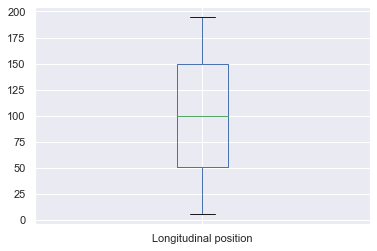

In [78]:
training_dataset[['Longitudinal position']].plot.box()

<AxesSubplot:>

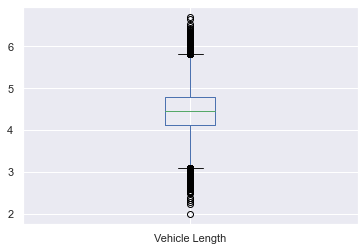

In [79]:
training_dataset[['Vehicle Length']].plot.box()

<AxesSubplot:>

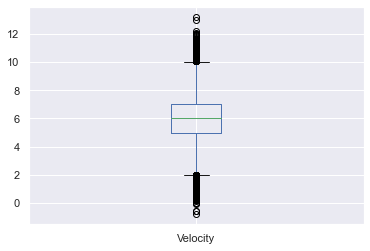

In [80]:
training_dataset[['Velocity']].plot.box()

AttributeError: 'Rectangle' object has no property 'bin'

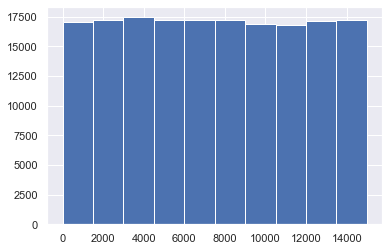